In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from math import sqrt

import DataAid
import Neros

In [5]:
# Collect the data from each of the folders
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
# Get the galaxies we want from each source
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])

## Create the Milky Way interpolation function

In [6]:
MW_rad = MWXueSofue[:,0]
MW_vLum = MWXueSofue[:,1]
# Interpolation function
MW_vLum_interp_func = interp1d(MW_rad, MW_vLum, kind='cubic')

## Running VNeros on every galaxy
We calculate vNeros for each galaxy and then plot the ratio between vNeros and the galaxy's vObs

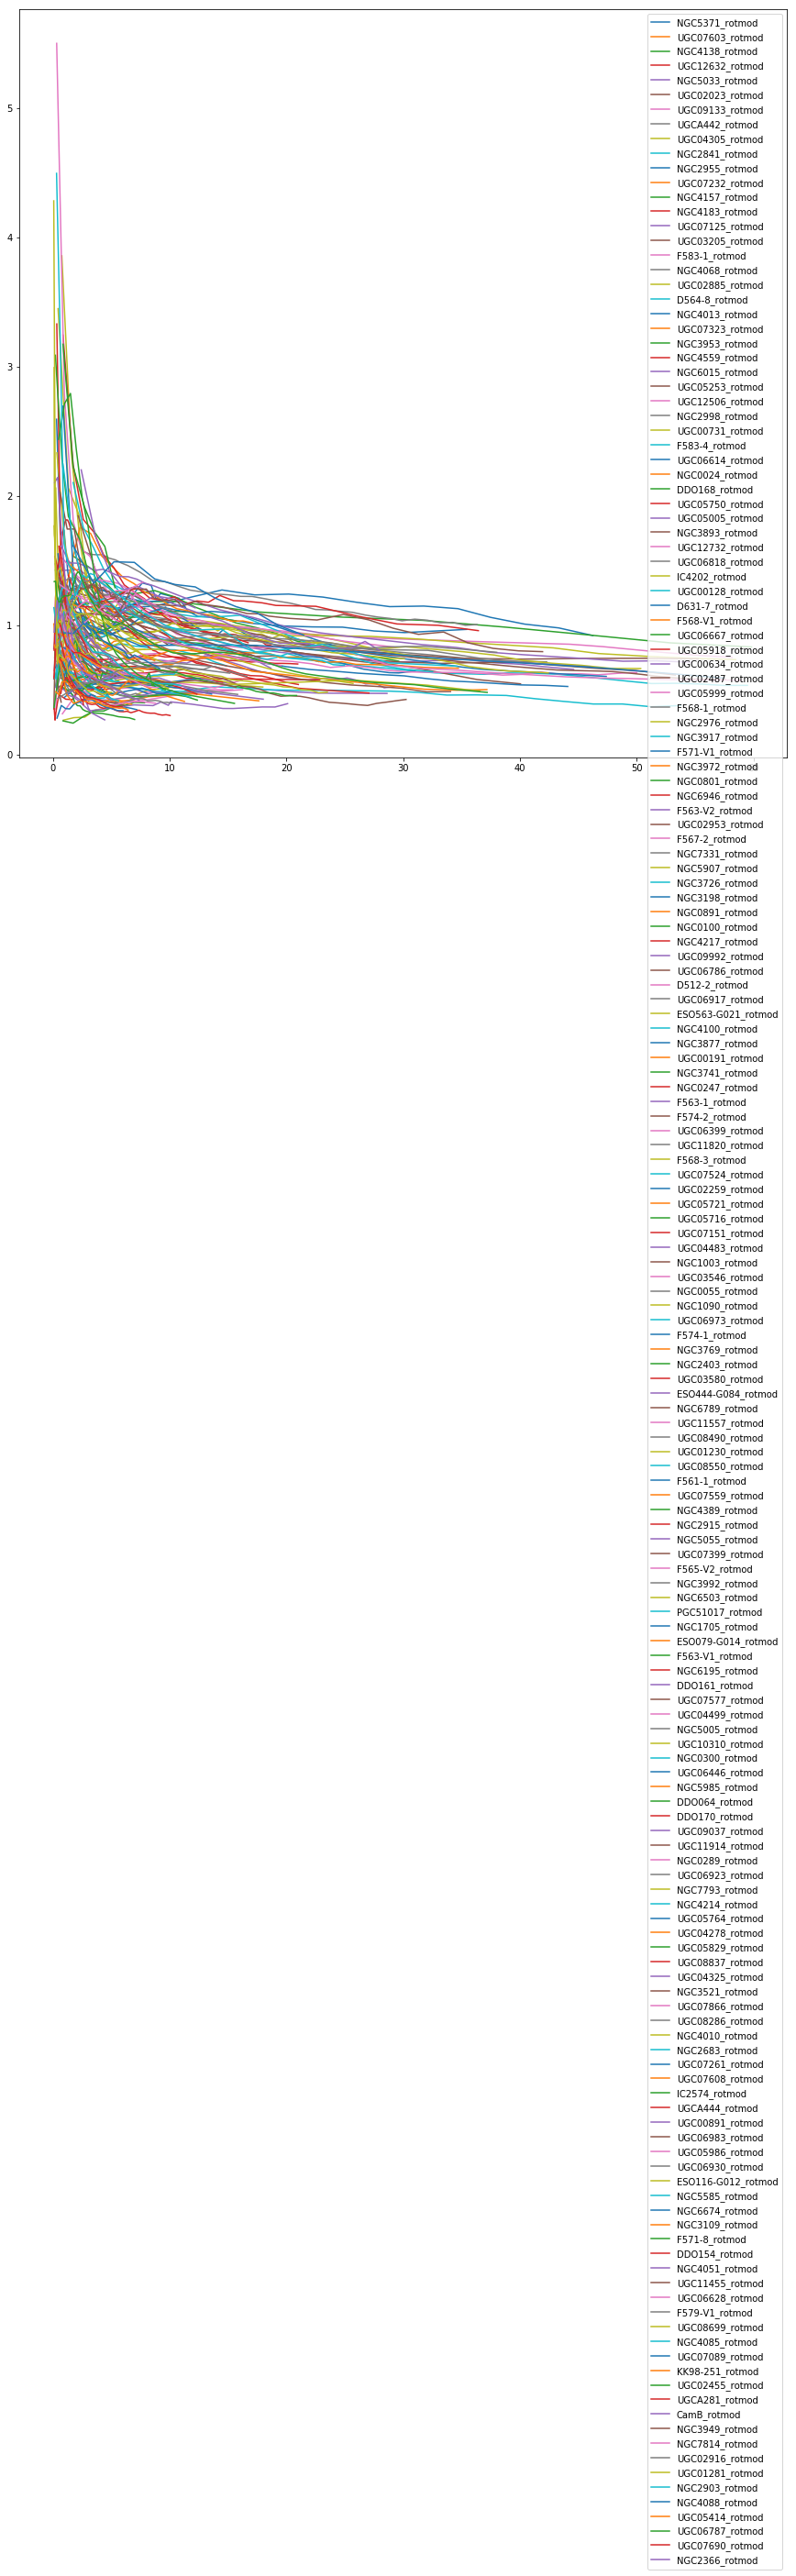

In [14]:
vLcmList = []
f, ax = plt.subplots(1, figsize=(15,15))
for galaxyName in sparcGalaxies:
    galaxy = np.array(sparcGalaxies[galaxyName])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]
    galaxy_vLumSquared = Neros.vLumSquared(galaxy_gas, galaxy_disk, galaxy_bulge)
    galaxy_vLum = np.sqrt(galaxy_vLumSquared)
    # Make sure the arrays are matching lengths
    maxMWRad = MW_rad[len(MW_rad)-1]
    for i in range(len(galaxy_rad)):
        if galaxy_rad[i] > maxMWRad:
            galaxy_rad = galaxy_rad[:i]
            galaxy_vLum = galaxy_vLum[:i]
            galaxy_vObs = galaxy_vObs[:i]
            break
    # Run vLCM
    vLcm = Neros.vLcm(galaxy_rad, MW_vLum_interp_func(galaxy_rad), galaxy_vLum )
    vLcmList.append(vLcm)
    vNeros = Neros.vNeros(galaxy_vLum, vLcm, 1)
    ratio = vNeros/galaxy_vObs
    # plot
    ax.plot(galaxy_rad, ratio, label=galaxyName)
ax.legend(loc="upper right")

## Fitting Galaxies

In [16]:
print('{0}\t{1}\t{2}'.format("Galaxy", "Alpha", "vLum"))

# Fit function
def simple(independents,alpha,vLumFreeParam):
    # Parse out data for the galaxy
    rad,vLum = independents
    # Apply the vLum free param to the data
    vLum = vLum*vLumFreeParam
    # Calc vLCM with alpha free param
    vLcm = Neros.vLcm(rad, MW_vLum_interp_func(rad), vLum)
    # Calc and return vNeros
    return Neros.vNeros(vLum, vLcm, alpha)
    
# Parse out data
for galaxyName in sparcGalaxies:
    galaxy = np.array(sparcGalaxies[galaxy_name])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]
    galaxy_vLumSquared = Neros.vLumSquared(galaxy_gas, galaxy_disk, galaxy_bulge)
    galaxy_vLum = np.sqrt(galaxy_vLumSquared)

    # Run fitter
    vals, cov = curve_fit(simple,(galaxy_rad, galaxy_vLum),galaxy_vObs)
    fittedAlpha, fittedVLumFreeParam = vals
    print('{0}\t{1}\t{2}'.format(galaxyName, fittedAlpha, fittedVLumFreeParam))

Galaxy	Alpha	vLum
NGC5371_rotmod	9649.167910725877	1.2162732353776822
UGC07603_rotmod	9649.167910725877	1.2162732353776822
NGC4138_rotmod	9649.167910725877	1.2162732353776822
UGC12632_rotmod	9649.167910725877	1.2162732353776822
NGC5033_rotmod	9649.167910725877	1.2162732353776822
UGC02023_rotmod	9649.167910725877	1.2162732353776822
UGC09133_rotmod	9649.167910725877	1.2162732353776822
UGCA442_rotmod	9649.167910725877	1.2162732353776822
UGC04305_rotmod	9649.167910725877	1.2162732353776822
NGC2841_rotmod	9649.167910725877	1.2162732353776822
NGC2955_rotmod	9649.167910725877	1.2162732353776822
UGC07232_rotmod	9649.167910725877	1.2162732353776822
NGC4157_rotmod	9649.167910725877	1.2162732353776822
NGC4183_rotmod	9649.167910725877	1.2162732353776822
UGC07125_rotmod	9649.167910725877	1.2162732353776822
UGC03205_rotmod	9649.167910725877	1.2162732353776822
F583-1_rotmod	9649.167910725877	1.2162732353776822
NGC4068_rotmod	9649.167910725877	1.2162732353776822
UGC02885_rotmod	9649.167910725877	1.216

NGC3949_rotmod	9649.167910725877	1.2162732353776822
NGC7814_rotmod	9649.167910725877	1.2162732353776822
UGC02916_rotmod	9649.167910725877	1.2162732353776822
UGC01281_rotmod	9649.167910725877	1.2162732353776822
NGC2903_rotmod	9649.167910725877	1.2162732353776822
NGC4088_rotmod	9649.167910725877	1.2162732353776822
UGC05414_rotmod	9649.167910725877	1.2162732353776822
UGC06787_rotmod	9649.167910725877	1.2162732353776822
UGC07690_rotmod	9649.167910725877	1.2162732353776822
NGC2366_rotmod	9649.167910725877	1.2162732353776822
